# MFE230T

## Jen-Chieh Cheng

Perform   data   scraping   and   processing   on   Yahoo   finance   using   Python   2.7   libraries.
1.   Get   historical   information   for   10   different   stocks   using   Yahoo   Finance   Website: E.g    https://finance.yahoo.com/quote/AMZN/history?p=AMZN
    - Scrape   a   year   of   stock   prices   and   stock   volumes.   What   was   your   criteria   for   choosing these   stocks?
    - Clean   your   data
    - Compute   basic   statistics   about   each   stock   prices   and   volume   (mean,   max,   std,   etc). Explain   your   findings
    - Make   the   following   plots:
        - 1   figure   of   time   series   for   all   stocks   (weekly,   monthly)   for   each   type   of   price   and volume
        - 1   figure   per   stock   showing   the   weekly   return
        - 1   figure   per   stock   showing   monthly   compounded   return
        - 1   figure   per   stock   showing   the   monthly   growth   of   a   stock
    - Explain   your   findings
    - Process   the   data   of   all   10   stocks   into   a   matrix   and   use   numpy/pandas   to   compute   SVD. Check   the   modes   and   plot   them.   Explain   your   findings.

2.   Get   historical   information   for   the   S&P   500   index   using   Yahoo   Finance https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC
    - Scrape   a   year   of   historical   data
    - Compute   basic   statistics
    - Plot   the   daily   returns   for   S&P   500
    - Plot   the   equity   curve   for   S&P   and   your   best   performing   stock   from   Part   1.
    - Explain   your   findings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import bs4
import urllib
from __future__ import division

%matplotlib inline
plt.style.use('ggplot')

In [2]:
def yahoo_stock_parser(ticker='NBI_comp'):

    url = 'https://finance.yahoo.com/quote/%s/history?p=%s'%(ticker, ticker)
    soup = bs4.BeautifulSoup(urllib.urlopen(url).read(), 'html5lib')
    
    table = soup.find('table', {'class': 'W(100%) M(0)'})
    table_head = table.find('thead').find('tr')#find_all('tr')
    table_body = table.find('tbody')
    table_idx = table_body.find_all('td', {'class' : 'Py(10px) Ta(start)'})
    
    col = [item.get_text().replace('*', '').replace(' ', '_') 
           for item in table_head.find_all("th")]
    dates = pd.DatetimeIndex([item.get_text() for item in table_idx])
    px_select = lambda tag: tag.name == 'td' and tag.get('class') == ['Py(10px)']

    c_float = lambda st: np.nan if st == '-' else float(st)
    px = [[c_float(item.get_text().replace(',', '')) for item in row.find_all(px_select)] 
              for row in table_body.find_all('tr')]
            
    return pd.DataFrame(px, index=dates, columns=col[1:])

Choose the 10 largest stocks from NBI (NASDAQ Biotechnology Index):


| Symbol  | Company Name  |
|:-:|:--|
|  ANIP | ANI Pharmaceuticals, Inc.  |
|  PETX  | Aratana Therapeutics, Inc.  |
|  XLRN | Acceleron Pharma Inc.  |
|  HALO | Halozyme Therapeutics, Inc.	 |
|  GHDX | Genomic Health, Inc. |
|  MYL | Mylan N.V.  |
|  VNDA | Vanda Pharmaceuticals Inc.  |
|  LMNX | Luminex Corporation  |
|  QGEN | QIAGEN N.V.  |
|  AMGN | Amgen Inc.  |


In [3]:
NBI_comp = ['ANIP', 'PETX', 'XLRN', 'GHDX', 'MYL', 'VNDA', 'LMNX', 'QGEN', 'AMGN', 'FOMX']

data_list = {tick: yahoo_stock_parser(tick) for tick in NBI_comp}

for tick in NBI_comp:
    data_list[tick].fillna(method='ffill', inplace=True)
    
stock = {label: pd.DataFrame({tick: data_list[tick][label].values for tick in NBI_comp},
                            index=data_list[NBI_comp[0]].index)
         for label in ['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']}

In [4]:
stock['Open'].describe()

,AMGN,ANIP,FOMX,GHDX,LMNX,MYL,PETX,QGEN,VNDA,XLRN
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,168.001800,47.425000,4.751400,31.660500,20.22950,36.621100,6.360000,32.631200,15.38900,31.444000
std,7.338439,2.599471,0.473278,1.275086,0.85462,3.299472,0.634836,1.486417,1.13377,3.244262
min,152.650000,43.240000,4.110000,28.730000,18.41000,29.490000,5.340000,28.280000,13.60000,24.480000
25%,162.687500,45.650000,4.377500,30.545000,19.35750,35.200000,5.900000,31.735000,14.25000,28.940000
50%,170.040000,47.210000,4.630000,31.845000,20.52500,38.030000,6.255000,32.680000,15.72500,31.545000
75%,173.580000,48.802500,5.010000,32.742500,20.87000,38.957500,6.985000,33.870000,16.35000,33.535000
max,182.050000,54.900000,5.890000,33.750000,21.54000,39.820000,7.600000,34.990000,17.45000,38.760000


In [5]:
stock['High'].describe()

,AMGN,ANIP,FOMX,GHDX,LMNX,MYL,PETX,QGEN,VNDA,XLRN
count,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,169.30930,48.058200,4.894700,32.10940,20.424000,37.031600,6.50270,32.827500,15.627000,32.272000
std,7.54444,2.566588,0.481669,1.19969,0.875497,3.185052,0.63743,1.519504,1.153528,3.234224
min,154.57000,43.980000,4.150000,29.52000,18.560000,30.600000,5.42000,28.570000,13.800000,25.510000
25%,163.57000,46.337500,4.547500,31.02750,19.407500,35.982500,6.03750,31.902500,14.522500,30.142500
50%,171.22500,47.710000,4.740000,32.32500,20.755000,38.410000,6.39000,32.810000,15.900000,32.415000
75%,174.72000,49.320000,5.200000,33.10500,21.032500,39.295000,7.08250,34.172500,16.557500,34.342500
max,182.77000,55.060000,5.990000,33.97000,22.270000,40.670000,7.67000,35.260000,17.520000,39.150000


In [6]:
stock['Low'].describe()

,AMGN,ANIP,FOMX,GHDX,LMNX,MYL,PETX,QGEN,VNDA,XLRN
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,166.969000,46.593200,4.621300,31.222500,20.014000,36.153100,6.217400,32.443100,15.162000,30.729800
std,7.259745,2.468413,0.435446,1.221156,0.815475,3.310163,0.617372,1.479708,1.131617,3.199992
min,152.160000,42.230000,4.050000,27.600000,18.220000,29.390000,5.180000,28.280000,13.210000,24.370000
25%,161.500000,44.917500,4.300000,30.065000,19.162500,33.925000,5.790000,31.515000,14.000000,28.440000
50%,168.760000,46.510000,4.450000,31.425000,20.255000,37.445000,6.115000,32.555000,15.450000,30.975000
75%,172.635000,47.992500,4.912500,32.067500,20.690000,38.612500,6.805000,33.717500,16.062500,32.460000
max,180.340000,53.850000,5.720000,33.230000,21.250000,39.710000,7.370000,34.760000,17.250000,37.730000


In [7]:
stock['Close'].describe()

,AMGN,ANIP,FOMX,GHDX,LMNX,MYL,PETX,QGEN,VNDA,XLRN
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000
mean,168.201000,47.315100,4.762800,31.698900,20.208700,36.548000,6.354300,32.627900,15.40050,31.55280
std,7.436366,2.530583,0.483406,1.218623,0.850551,3.268795,0.629181,1.522294,1.12507,3.25589
min,153.020000,43.450000,4.070000,29.000000,18.250000,29.630000,5.320000,28.540000,13.65000,25.25000
25%,162.702500,45.612500,4.407500,30.632500,19.285000,34.255000,5.887500,31.630000,14.28750,29.12500
50%,169.845000,47.145000,4.640000,31.890000,20.470000,37.975000,6.260000,32.625000,15.60000,31.56000
75%,173.827500,48.662500,5.097500,32.780000,20.857500,38.835000,6.957500,34.025000,16.30000,33.29500
max,181.060000,54.840000,5.940000,33.720000,21.460000,40.090000,7.600000,34.930000,17.45000,38.76000


In [8]:
stock['Adj_Close'].describe()

,AMGN,ANIP,FOMX,GHDX,LMNX,MYL,PETX,QGEN,VNDA,XLRN
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000
mean,167.108300,47.315100,4.762800,31.698900,20.183700,36.548000,6.354300,32.627900,15.40050,31.55280
std,7.691998,2.530583,0.483406,1.218623,0.845893,3.268795,0.629181,1.522294,1.12507,3.25589
min,151.990000,43.450000,4.070000,29.000000,18.200000,29.630000,5.320000,28.540000,13.65000,25.25000
25%,160.855000,45.612500,4.407500,30.632500,19.285000,34.255000,5.887500,31.630000,14.28750,29.12500
50%,169.725000,47.145000,4.640000,31.890000,20.460000,37.975000,6.260000,32.625000,15.60000,31.56000
75%,172.742500,48.662500,5.097500,32.780000,20.825000,38.835000,6.957500,34.025000,16.30000,33.29500
max,180.710000,54.840000,5.940000,33.720000,21.400000,40.090000,7.600000,34.930000,17.45000,38.76000


In [9]:
stock['Volume'].describe().round(2)

,AMGN,ANIP,FOMX,GHDX,LMNX,MYL,PETX,QGEN,VNDA,XLRN
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,3020282.00,118440.00,126015.00,107383.00,205278.00,5897158.00,339848.00,859937.00,473845.00,353446.00
std,1589558.45,65355.79,79964.04,57148.18,129887.35,4032858.53,160703.15,408071.83,210210.54,190509.46
min,1193800.00,39900.00,18300.00,34700.00,68400.00,1854700.00,134600.00,379600.00,181700.00,118400.00
25%,2206400.00,79450.00,72550.00,73925.00,137500.00,3703375.00,218150.00,596875.00,317400.00,221850.00
50%,2683550.00,106300.00,103500.00,92650.00,174900.00,4742650.00,299850.00,740150.00,439700.00,301350.00
75%,3368350.00,135725.00,158625.00,118625.00,232625.00,6410925.00,412600.00,1021600.00,560950.00,412475.00
max,14368500.00,496800.00,504600.00,425600.00,1185700.00,32038100.00,1055800.00,2632400.00,1402800.00,985200.00


## Findings:

It's hard to tell solely from each stock prices since they all prices are on different scales. When we consider both price and volume, we find that AMGN is actually a lot larger than rest of the 9.

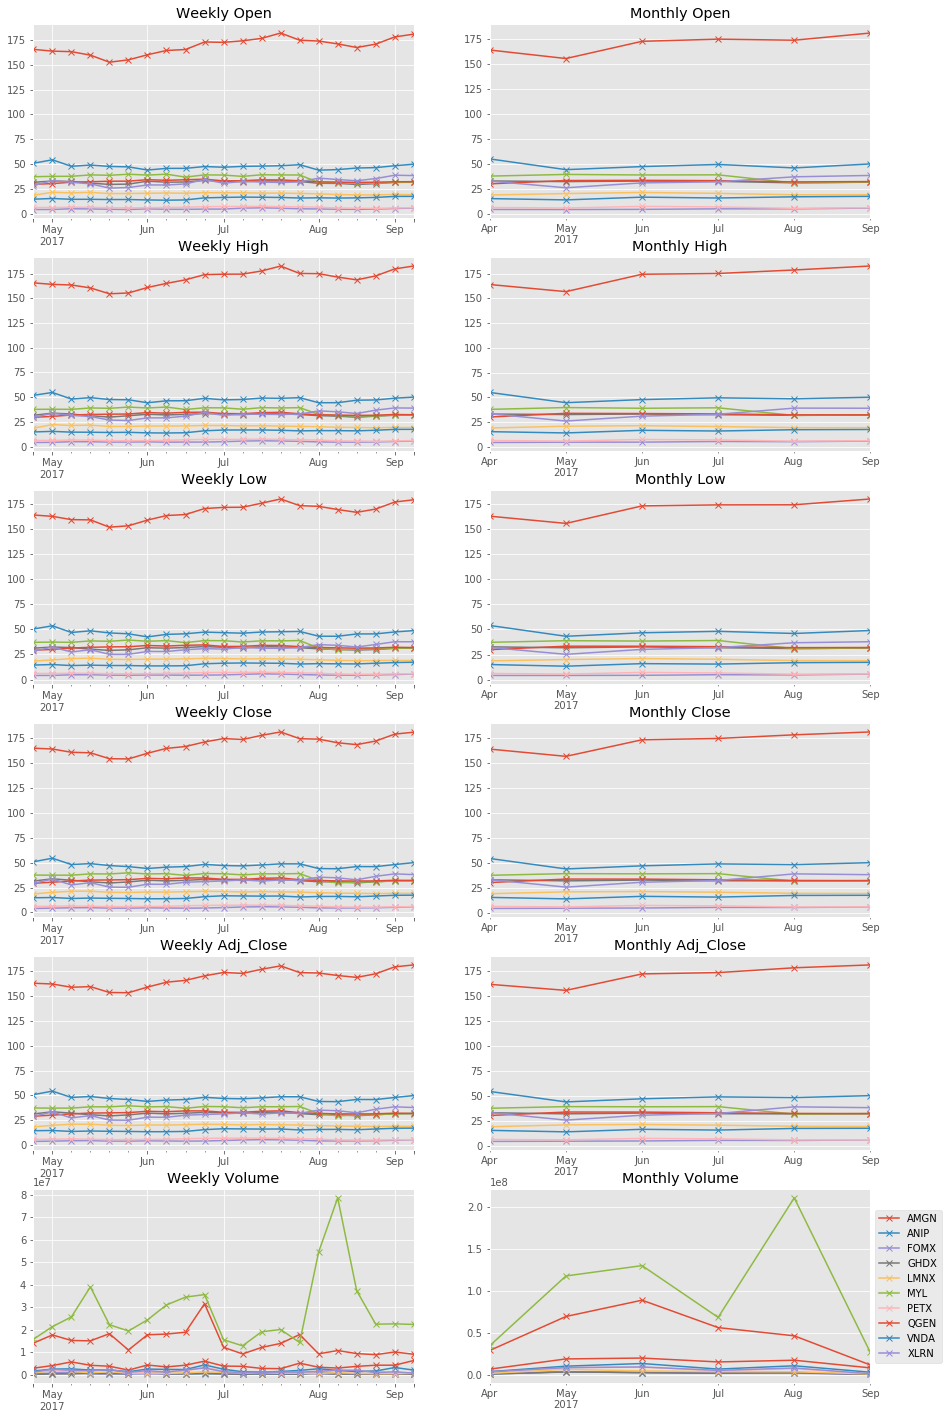

In [10]:
f, ax = plt.subplots(6, 2, figsize=(15,25))

for i, px in enumerate(['Open', 'High', 'Low', 'Close', 'Adj_Close']):

    stock[px].resample('W-MON').last().plot(ax=ax[i][0],marker='x', title='Weekly %s'%px, legend=False)
    stock[px].resample('M').last().plot(ax=ax[i][1],marker='x', title='Monthly %s'%px, legend=False)

stock['Volume'].resample('W-MON').sum().plot(ax=ax[5][0],marker='x', title='Weekly Volume', legend=False)
stock['Volume'].resample('M').sum().plot(ax=ax[5][1],marker='x' ,title='Monthly Volume', legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

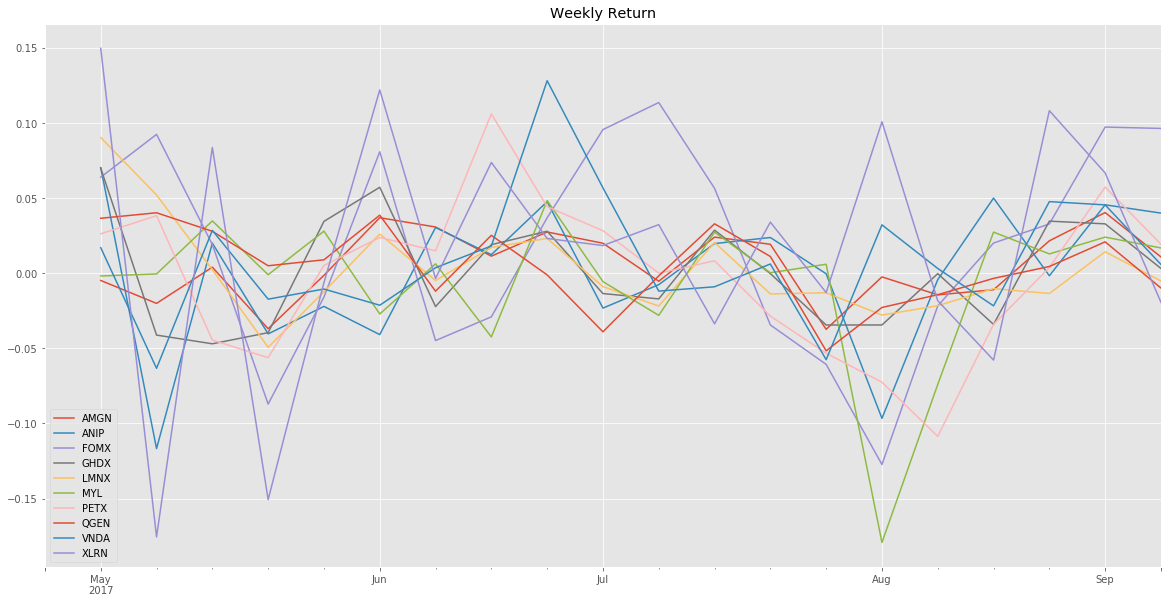

In [11]:
stock['Adj_Close'].resample('W-MON').last().pct_change().plot(title='Weekly Return', figsize=(20,10))

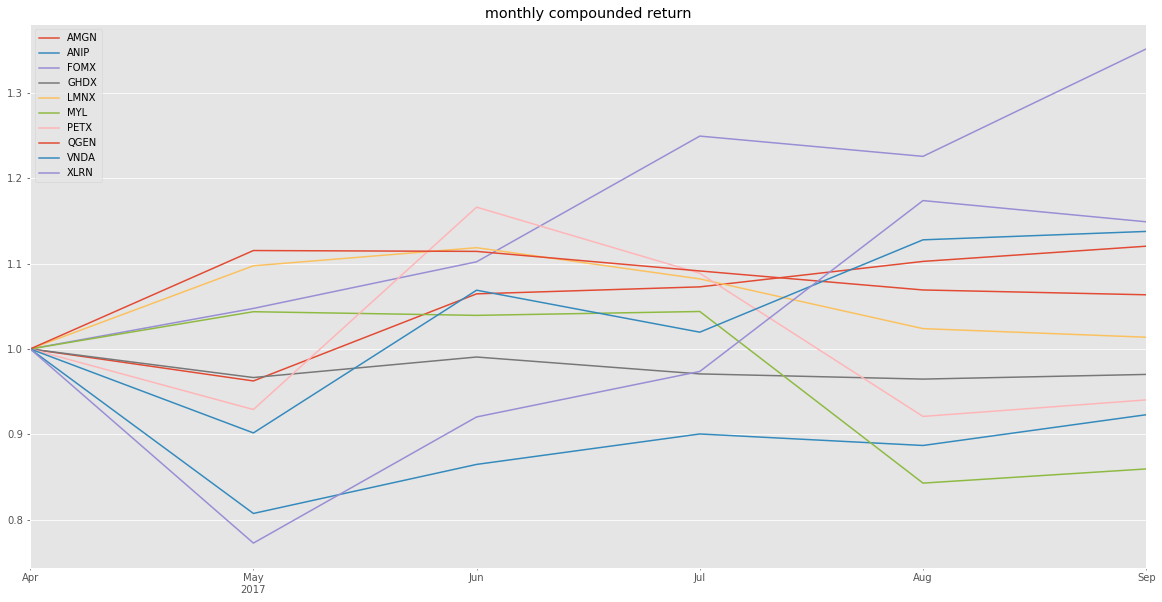

In [12]:
# suppose we invested from 4/30
(stock['Adj_Close'].resample('M').last().pct_change().fillna(0)+1).\
cumprod().plot(title='monthly compounded return', figsize=(20,10))

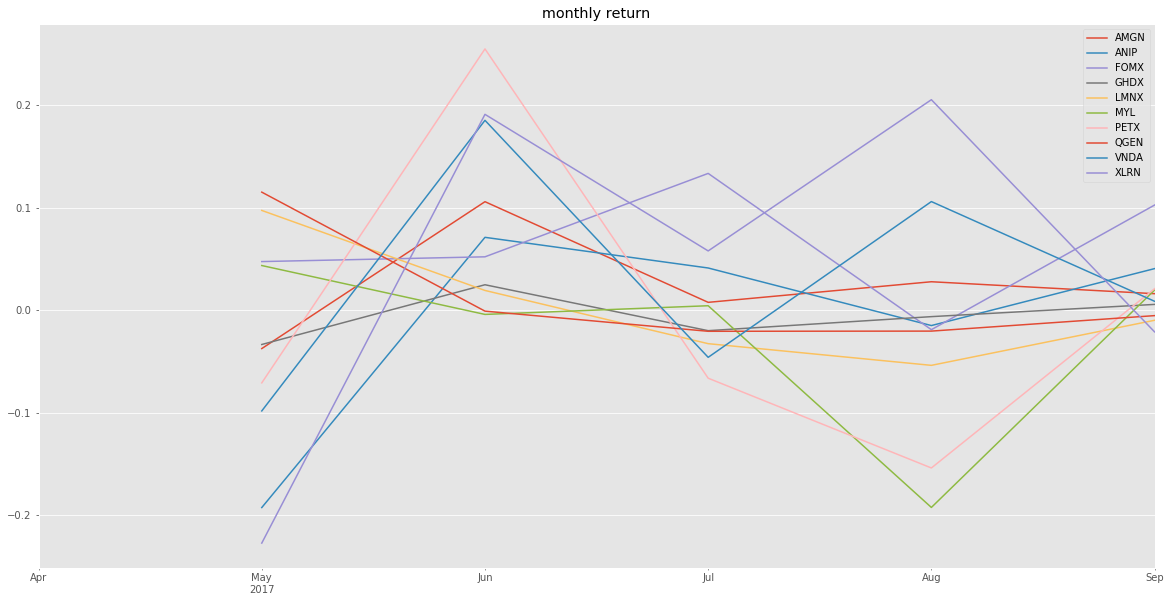

In [13]:
# suppose we invested from 4/30
stock['Adj_Close'].resample('M').last().pct_change().\
plot(title='monthly return', figsize=(20,10))

## Findings:

Some of these stocks delivered exceptionally great returns over this period of time (>10%), and from weekly and monthly return, the 10 stock behave somewhat comovements.

[ 1879.49039554    53.17857552    28.41109213    12.66290633     8.27604257
     7.12830448     5.08455443     4.23049258     3.05801333     2.70822838]


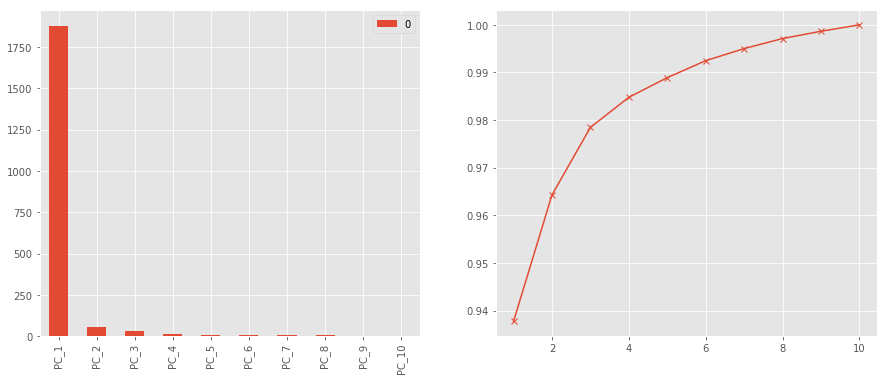

In [14]:
X = stock['Adj_Close'].values
_, s, _ = np.linalg.svd(X)

print s

f, ax = plt.subplots(1, 2, figsize=(15,6))

pd.DataFrame(s, index=['PC_%s'%str(i+1) for i in range(len(NBI_comp))]).plot.bar(ax=ax[0])
ax[1].plot(np.arange(1, len(NBI_comp)+1), s.cumsum()/s.sum(), marker='x')

## Findings:

Use daily price to do SVD, the largest principle component can explained 95% of variance over the period. The result is not surprising since these stock are in the same sector.

In [15]:
SP = yahoo_stock_parser('^GSPC')
NBI = yahoo_stock_parser('^NBI')
SP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2017-09-08 to 2017-04-19
Data columns (total 6 columns):
Open         100 non-null float64
High         100 non-null float64
Low          100 non-null float64
Close        100 non-null float64
Adj_Close    100 non-null float64
Volume       100 non-null float64
dtypes: float64(6)
memory usage: 5.5 KB


In [16]:
SP.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,100.000000,100.00000,100.000000,100.000000,100.000000,1.000000e+02
mean,2431.147500,2436.87320,2424.332100,2431.128200,2431.128200,3.409061e+09
std,34.067162,33.31257,33.941544,33.831718,33.831718,5.120250e+08
min,2342.690000,2352.63000,2335.050000,2338.170000,2338.170000,1.962290e+09
25%,2403.807500,2405.72250,2397.505000,2403.872500,2403.872500,3.096980e+09
50%,2434.210000,2441.44500,2428.160000,2434.145000,2434.145000,3.370815e+09
75%,2462.350000,2465.81250,2451.495000,2459.605000,2459.605000,3.643902e+09
max,2482.760000,2490.87000,2475.880000,2480.910000,2480.910000,5.284720e+09


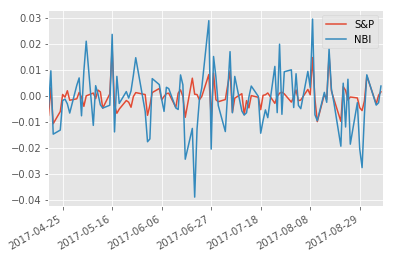

In [17]:
NBI = yahoo_stock_parser('^NBI')

SP.Adj_Close.pct_change().plot(label='S&P')
NBI.Adj_Close.pct_change().plot(label='NBI')
plt.legend()

FOMX


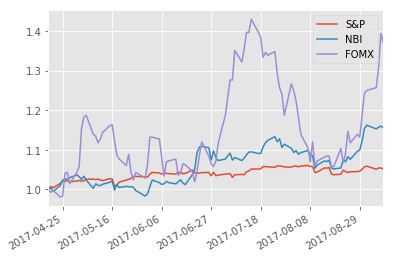

In [18]:
best_perform = (stock['Adj_Close'].iloc[0,:]/stock['Adj_Close'].iloc[-1,:]).argmax()
print best_perform

(SP.Adj_Close / SP.Adj_Close.iloc[-1]).plot(label='S&P')
(NBI.Adj_Close / NBI.Adj_Close.iloc[-1]).plot(label='NBI')
(stock['Adj_Close'][best_perform] / stock['Adj_Close'][best_perform].iloc[-1]).plot(label=best_perform)
plt.legend()

In [19]:
(stock['Adj_Close'].iloc[0,:]/stock['Adj_Close'].iloc[-1,:])

AMGN    1.141918
ANIP    0.987544
FOMX    1.371084
GHDX    1.003147
LMNX    1.040217
MYL     0.868506
PETX    1.005172
QGEN    1.121233
VNDA    1.234875
XLRN    1.347301
dtype: float64

## Findings:

Beside S&P500, we include the industrial index NBI as another benchmark. NBI is more volatile than S&P500, and demonstrate even more comovement with FOMX, the best-performing choosen stock over the period. From the equity curve plot, we can see that FOMX > NBI > S&P500, but equity curve of NBI is too volatile. So index-investing might be a better way to expose to certain sector.